# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 17.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 17.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 29.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 225 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [9]:
client = MongoClient(mongod_connect)
db = client.gp6 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [10]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [11]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [12]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326988484326936576
1326988484737970179
1326988484431786008
1326988485140516864
1326988484968673280
1326988485304086528
1326988485572636673
1326988485857849349
1326988485908164608
1326988486000349185
1326988486747037696
1326988486805757952
1326988487053225986
1326988487111958531
1326988488038748162
1326988487917252642
1326988489322156032
1326988490861666304
1326988490861654043
1326988490920357888
1326988491352248320
1326988491847168000
1326988492778450951
1326988493667655681
1326988493994799111
1326988494665867264
1326988495609532416
1326988496045813768
1326988497073434630
1326988498109411357
1326988498113417216
1326988498138771464
1326988496767242240
1326988498742730756
1326988498809860113
1326988499153793039
1326988499543863301
1326988499946364930
1326988500273680385
1326988500886032384
1326988500965744641
1326988501242556417
1326988501871714306
1326988502056267776
1326988503104675840
1326988504115634179
1326988504581230608
1326988505738850316
1326988506644799490
1326988506883895296


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [14]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [15]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 12 20:43:31 +0000 2020'
'Thu Nov 12 20:43:31 +0000 2020'
'Thu Nov 12 20:43:31 +0000 2020'
'Thu Nov 12 20:43:30 +0000 2020'
'Thu Nov 12 20:43:30 +0000 2020'
'Thu Nov 12 20:43:30 +0000 2020'
'Thu Nov 12 20:43:30 +0000 2020'
'Thu Nov 12 20:43:29 +0000 2020'
'Thu Nov 12 20:43:29 +0000 2020'
'Thu Nov 12 20:43:29 +0000 2020'
'Thu Nov 12 20:43:29 +0000 2020'
'Thu Nov 12 20:43:29 +0000 2020'
'Thu Nov 12 20:43:29 +0000 2020'
'Thu Nov 12 20:43:28 +0000 2020'
'Thu Nov 12 20:43:28 +0000 2020'
'Thu Nov 12 20:43:28 +0000 2020'
'Thu Nov 12 20:43:28 +0000 2020'
'Thu Nov 12 20:43:28 +0000 2020'
'Thu Nov 12 20:43:28 +0000 2020'
'Thu Nov 12 20:43:28 +0000 2020'
'Thu Nov 12 20:43:27 +0000 2020'
'Thu Nov 12 20:43:27 +0000 2020'
'Thu Nov 12 20:43:27 +0000 2020'
'Thu Nov 12 20:43:27 +0000 2020'
'Thu Nov 12 20:43:27 +0000 2020'
'Thu Nov 12 20:43:27 +0000 2020'
'Thu Nov 12 20:43:27 +0000 2020'
'Thu Nov 12 20:43:27 +0000 2020'
'Thu Nov 12 20:43:26 +0000 2020'
'Thu Nov 12 20:43:26 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 12 20:43:12 +0000 2020'
'Thu Nov 12 20:43:12 +0000 2020'
'Thu Nov 12 20:43:12 +0000 2020'
'Thu Nov 12 20:43:12 +0000 2020'
'Thu Nov 12 20:43:12 +0000 2020'
'Thu Nov 12 20:43:12 +0000 2020'
'Thu Nov 12 20:43:11 +0000 2020'
'Thu Nov 12 20:43:11 +0000 2020'
'Thu Nov 12 20:43:11 +0000 2020'
'Thu Nov 12 20:43:11 +0000 2020'
'Thu Nov 12 20:43:11 +0000 2020'
'Thu Nov 12 20:43:11 +0000 2020'
'Thu Nov 12 20:43:10 +0000 2020'
'Thu Nov 12 20:43:10 +0000 2020'
'Thu Nov 12 20:43:10 +0000 2020'
'Thu Nov 12 20:43:10 +0000 2020'
'Thu Nov 12 20:43:10 +0000 2020'
'Thu Nov 12 20:43:10 +0000 2020'
'Thu Nov 12 20:43:10 +0000 2020'
'Thu Nov 12 20:43:10 +0000 2020'
'Thu Nov 12 20:43:10 +0000 2020'
'Thu Nov 12 20:43:09 +0000 2020'
'Thu Nov 12 20:43:09 +0000 2020'
'Thu Nov 12 20:43:08 +0000 2020'
'Thu Nov 12 20:43:08 +0000 2020'
'Thu Nov 12 20:43:08 +0000 2020'
'Thu Nov 12 20:43:08 +0000 2020'
'Thu Nov 12 20:43:08 +0000 2020'
'Thu Nov 12 20:43:07 +0000 2020'
'Thu Nov 12 20:43:07 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:42:12 +0000 2020'
'Thu Nov 12 20:42:12 +0000 2020'
'Thu Nov 12 20:42:12 +0000 2020'
'Thu Nov 12 20:42:12 +0000 2020'
'Thu Nov 12 20:42:12 +0000 2020'
'Thu Nov 12 20:42:12 +0000 2020'
'Thu Nov 12 20:42:11 +0000 2020'
'Thu Nov 12 20:42:11 +0000 2020'
'Thu Nov 12 20:42:11 +0000 2020'
'Thu Nov 12 20:42:11 +0000 2020'
'Thu Nov 12 20:42:11 +0000 2020'
'Thu Nov 12 20:42:10 +0000 2020'
'Thu Nov 12 20:42:10 +0000 2020'
'Thu Nov 12 20:42:10 +0000 2020'
'Thu Nov 12 20:42:09 +0000 2020'
'Thu Nov 12 20:42:09 +0000 2020'
'Thu Nov 12 20:42:09 +0000 2020'
'Thu Nov 12 20:42:09 +0000 2020'
'Thu Nov 12 20:42:09 +0000 2020'
'Thu Nov 12 20:42:08 +0000 2020'
'Thu Nov 12 20:42:08 +0000 2020'
'Thu Nov 12 20:42:08 +0000 2020'
'Thu Nov 12 20:42:08 +0000 2020'
'Thu Nov 12 20:42:08 +0000 2020'
'Thu Nov 12 20:42:08 +0000 2020'
'Thu Nov 12 20:42:08 +0000 2020'
'Thu Nov 12 20:42:08 +0000 2020'
'Thu Nov 12 20:42:07 +0000 2020'
'Thu Nov 12 20:42:07 +0000 2020'
'Thu Nov 12 20:42:07 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:40:33 +0000 2020'
'Thu Nov 12 20:40:33 +0000 2020'
'Thu Nov 12 20:40:33 +0000 2020'
'Thu Nov 12 20:40:33 +0000 2020'
'Thu Nov 12 20:40:33 +0000 2020'
'Thu Nov 12 20:40:33 +0000 2020'
'Thu Nov 12 20:40:33 +0000 2020'
'Thu Nov 12 20:40:33 +0000 2020'
'Thu Nov 12 20:40:32 +0000 2020'
'Thu Nov 12 20:40:31 +0000 2020'
'Thu Nov 12 20:40:31 +0000 2020'
'Thu Nov 12 20:40:31 +0000 2020'
'Thu Nov 12 20:40:30 +0000 2020'
'Thu Nov 12 20:40:30 +0000 2020'
'Thu Nov 12 20:40:29 +0000 2020'
'Thu Nov 12 20:40:29 +0000 2020'
'Thu Nov 12 20:40:28 +0000 2020'
'Thu Nov 12 20:40:28 +0000 2020'
'Thu Nov 12 20:40:28 +0000 2020'
'Thu Nov 12 20:40:27 +0000 2020'
'Thu Nov 12 20:40:27 +0000 2020'
'Thu Nov 12 20:40:27 +0000 2020'
'Thu Nov 12 20:40:27 +0000 2020'
'Thu Nov 12 20:40:27 +0000 2020'
'Thu Nov 12 20:40:26 +0000 2020'
'Thu Nov 12 20:40:26 +0000 2020'
'Thu Nov 12 20:40:26 +0000 2020'
'Thu Nov 12 20:40:26 +0000 2020'
'Thu Nov 12 20:40:26 +0000 2020'
'Thu Nov 12 20:40:26 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:39:36 +0000 2020'
'Thu Nov 12 20:39:36 +0000 2020'
'Thu Nov 12 20:39:35 +0000 2020'
'Thu Nov 12 20:39:35 +0000 2020'
'Thu Nov 12 20:39:35 +0000 2020'
'Thu Nov 12 20:39:35 +0000 2020'
'Thu Nov 12 20:39:35 +0000 2020'
'Thu Nov 12 20:39:34 +0000 2020'
'Thu Nov 12 20:39:34 +0000 2020'
'Thu Nov 12 20:39:34 +0000 2020'
'Thu Nov 12 20:39:33 +0000 2020'
'Thu Nov 12 20:39:33 +0000 2020'
'Thu Nov 12 20:39:33 +0000 2020'
'Thu Nov 12 20:39:33 +0000 2020'
'Thu Nov 12 20:39:32 +0000 2020'
'Thu Nov 12 20:39:32 +0000 2020'
'Thu Nov 12 20:39:32 +0000 2020'
'Thu Nov 12 20:39:32 +0000 2020'
'Thu Nov 12 20:39:32 +0000 2020'
'Thu Nov 12 20:39:32 +0000 2020'
'Thu Nov 12 20:39:31 +0000 2020'
'Thu Nov 12 20:39:31 +0000 2020'
'Thu Nov 12 20:39:31 +0000 2020'
'Thu Nov 12 20:39:31 +0000 2020'
'Thu Nov 12 20:39:31 +0000 2020'
'Thu Nov 12 20:39:31 +0000 2020'
'Thu Nov 12 20:39:31 +0000 2020'
'Thu Nov 12 20:39:30 +0000 2020'
'Thu Nov 12 20:39:30 +0000 2020'
'Thu Nov 12 20:39:30 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:38:38 +0000 2020'
'Thu Nov 12 20:38:38 +0000 2020'
'Thu Nov 12 20:38:38 +0000 2020'
'Thu Nov 12 20:38:37 +0000 2020'
'Thu Nov 12 20:38:37 +0000 2020'
'Thu Nov 12 20:38:37 +0000 2020'
'Thu Nov 12 20:38:37 +0000 2020'
'Thu Nov 12 20:38:36 +0000 2020'
'Thu Nov 12 20:38:36 +0000 2020'
'Thu Nov 12 20:38:35 +0000 2020'
'Thu Nov 12 20:38:35 +0000 2020'
'Thu Nov 12 20:38:35 +0000 2020'
'Thu Nov 12 20:38:34 +0000 2020'
'Thu Nov 12 20:38:34 +0000 2020'
'Thu Nov 12 20:38:34 +0000 2020'
'Thu Nov 12 20:38:34 +0000 2020'
'Thu Nov 12 20:38:34 +0000 2020'
'Thu Nov 12 20:38:33 +0000 2020'
'Thu Nov 12 20:38:33 +0000 2020'
'Thu Nov 12 20:38:32 +0000 2020'
'Thu Nov 12 20:38:32 +0000 2020'
'Thu Nov 12 20:38:32 +0000 2020'
'Thu Nov 12 20:38:32 +0000 2020'
'Thu Nov 12 20:38:32 +0000 2020'
'Thu Nov 12 20:38:32 +0000 2020'
'Thu Nov 12 20:38:31 +0000 2020'
'Thu Nov 12 20:38:31 +0000 2020'
'Thu Nov 12 20:38:31 +0000 2020'
'Thu Nov 12 20:38:31 +0000 2020'
'Thu Nov 12 20:38:30 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:37:38 +0000 2020'
'Thu Nov 12 20:37:38 +0000 2020'
'Thu Nov 12 20:37:38 +0000 2020'
'Thu Nov 12 20:37:38 +0000 2020'
'Thu Nov 12 20:37:38 +0000 2020'
'Thu Nov 12 20:37:38 +0000 2020'
'Thu Nov 12 20:37:38 +0000 2020'
'Thu Nov 12 20:37:38 +0000 2020'
'Thu Nov 12 20:37:37 +0000 2020'
'Thu Nov 12 20:37:37 +0000 2020'
'Thu Nov 12 20:37:37 +0000 2020'
'Thu Nov 12 20:37:37 +0000 2020'
'Thu Nov 12 20:37:37 +0000 2020'
'Thu Nov 12 20:37:37 +0000 2020'
'Thu Nov 12 20:37:36 +0000 2020'
'Thu Nov 12 20:37:36 +0000 2020'
'Thu Nov 12 20:37:36 +0000 2020'
'Thu Nov 12 20:37:36 +0000 2020'
'Thu Nov 12 20:37:36 +0000 2020'
'Thu Nov 12 20:37:36 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 12 20:37:35 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:36:50 +0000 2020'
'Thu Nov 12 20:36:50 +0000 2020'
'Thu Nov 12 20:36:50 +0000 2020'
'Thu Nov 12 20:36:50 +0000 2020'
'Thu Nov 12 20:36:49 +0000 2020'
'Thu Nov 12 20:36:49 +0000 2020'
'Thu Nov 12 20:36:49 +0000 2020'
'Thu Nov 12 20:36:49 +0000 2020'
'Thu Nov 12 20:36:49 +0000 2020'
'Thu Nov 12 20:36:48 +0000 2020'
'Thu Nov 12 20:36:48 +0000 2020'
'Thu Nov 12 20:36:48 +0000 2020'
'Thu Nov 12 20:36:48 +0000 2020'
'Thu Nov 12 20:36:47 +0000 2020'
'Thu Nov 12 20:36:47 +0000 2020'
'Thu Nov 12 20:36:47 +0000 2020'
'Thu Nov 12 20:36:46 +0000 2020'
'Thu Nov 12 20:36:46 +0000 2020'
'Thu Nov 12 20:36:45 +0000 2020'
'Thu Nov 12 20:36:45 +0000 2020'
'Thu Nov 12 20:36:45 +0000 2020'
'Thu Nov 12 20:36:44 +0000 2020'
'Thu Nov 12 20:36:44 +0000 2020'
'Thu Nov 12 20:36:44 +0000 2020'
'Thu Nov 12 20:36:44 +0000 2020'
'Thu Nov 12 20:36:44 +0000 2020'
'Thu Nov 12 20:36:43 +0000 2020'
'Thu Nov 12 20:36:43 +0000 2020'
'Thu Nov 12 20:36:43 +0000 2020'
'Thu Nov 12 20:36:42 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:35:46 +0000 2020'
'Thu Nov 12 20:35:46 +0000 2020'
'Thu Nov 12 20:35:46 +0000 2020'
'Thu Nov 12 20:35:45 +0000 2020'
'Thu Nov 12 20:35:45 +0000 2020'
'Thu Nov 12 20:35:45 +0000 2020'
'Thu Nov 12 20:35:45 +0000 2020'
'Thu Nov 12 20:35:44 +0000 2020'
'Thu Nov 12 20:35:44 +0000 2020'
'Thu Nov 12 20:35:43 +0000 2020'
'Thu Nov 12 20:35:43 +0000 2020'
'Thu Nov 12 20:35:43 +0000 2020'
'Thu Nov 12 20:35:43 +0000 2020'
'Thu Nov 12 20:35:42 +0000 2020'
'Thu Nov 12 20:35:42 +0000 2020'
'Thu Nov 12 20:35:42 +0000 2020'
'Thu Nov 12 20:35:42 +0000 2020'
'Thu Nov 12 20:35:42 +0000 2020'
'Thu Nov 12 20:35:42 +0000 2020'
'Thu Nov 12 20:35:42 +0000 2020'
'Thu Nov 12 20:35:42 +0000 2020'
'Thu Nov 12 20:35:41 +0000 2020'
'Thu Nov 12 20:35:41 +0000 2020'
'Thu Nov 12 20:35:40 +0000 2020'
'Thu Nov 12 20:35:39 +0000 2020'
'Thu Nov 12 20:35:39 +0000 2020'
'Thu Nov 12 20:35:39 +0000 2020'
'Thu Nov 12 20:35:39 +0000 2020'
'Thu Nov 12 20:35:38 +0000 2020'
'Thu Nov 12 20:35:38 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:34:50 +0000 2020'
'Thu Nov 12 20:34:49 +0000 2020'
'Thu Nov 12 20:34:49 +0000 2020'
'Thu Nov 12 20:34:49 +0000 2020'
'Thu Nov 12 20:34:48 +0000 2020'
'Thu Nov 12 20:34:48 +0000 2020'
'Thu Nov 12 20:34:48 +0000 2020'
'Thu Nov 12 20:34:47 +0000 2020'
'Thu Nov 12 20:34:47 +0000 2020'
'Thu Nov 12 20:34:47 +0000 2020'
'Thu Nov 12 20:34:47 +0000 2020'
'Thu Nov 12 20:34:47 +0000 2020'
'Thu Nov 12 20:34:47 +0000 2020'
'Thu Nov 12 20:34:47 +0000 2020'
'Thu Nov 12 20:34:46 +0000 2020'
'Thu Nov 12 20:34:46 +0000 2020'
'Thu Nov 12 20:34:46 +0000 2020'
'Thu Nov 12 20:34:46 +0000 2020'
'Thu Nov 12 20:34:46 +0000 2020'
'Thu Nov 12 20:34:45 +0000 2020'
'Thu Nov 12 20:34:45 +0000 2020'
'Thu Nov 12 20:34:45 +0000 2020'
'Thu Nov 12 20:34:44 +0000 2020'
'Thu Nov 12 20:34:44 +0000 2020'
'Thu Nov 12 20:34:43 +0000 2020'
'Thu Nov 12 20:34:43 +0000 2020'
'Thu Nov 12 20:34:42 +0000 2020'
'Thu Nov 12 20:34:42 +0000 2020'
'Thu Nov 12 20:34:42 +0000 2020'
'Thu Nov 12 20:34:42 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:33:54 +0000 2020'
'Thu Nov 12 20:33:54 +0000 2020'
'Thu Nov 12 20:33:54 +0000 2020'
'Thu Nov 12 20:33:54 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:53 +0000 2020'
'Thu Nov 12 20:33:52 +0000 2020'
'Thu Nov 12 20:33:52 +0000 2020'
'Thu Nov 12 20:33:52 +0000 2020'
'Thu Nov 12 20:33:52 +0000 2020'
'Thu Nov 12 20:33:51 +0000 2020'
'Thu Nov 12 20:33:51 +0000 2020'
'Thu Nov 12 20:33:50 +0000 2020'
'Thu Nov 12 20:33:50 +0000 2020'
'Thu Nov 12 20:33:50 +0000 2020'
'Thu Nov 12 20:33:50 +0000 2020'
'Thu Nov 12 20:33:50 +0000 2020'
'Thu Nov 12 20:33:50 +0000 2020'
'Thu Nov 12 20:33:50 +0000 2020'
'Thu Nov 12 20:33:49 +0000 2020'
'Thu Nov 12 20:33:49 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:33:04 +0000 2020'
'Thu Nov 12 20:33:04 +0000 2020'
'Thu Nov 12 20:33:03 +0000 2020'
'Thu Nov 12 20:33:03 +0000 2020'
'Thu Nov 12 20:33:03 +0000 2020'
'Thu Nov 12 20:33:03 +0000 2020'
'Thu Nov 12 20:33:03 +0000 2020'
'Thu Nov 12 20:33:02 +0000 2020'
'Thu Nov 12 20:33:02 +0000 2020'
'Thu Nov 12 20:33:02 +0000 2020'
'Thu Nov 12 20:33:02 +0000 2020'
'Thu Nov 12 20:33:02 +0000 2020'
'Thu Nov 12 20:33:02 +0000 2020'
'Thu Nov 12 20:33:02 +0000 2020'
'Thu Nov 12 20:33:02 +0000 2020'
'Thu Nov 12 20:33:01 +0000 2020'
'Thu Nov 12 20:33:01 +0000 2020'
'Thu Nov 12 20:33:01 +0000 2020'
'Thu Nov 12 20:33:00 +0000 2020'
'Thu Nov 12 20:33:00 +0000 2020'
'Thu Nov 12 20:33:00 +0000 2020'
'Thu Nov 12 20:33:00 +0000 2020'
'Thu Nov 12 20:33:00 +0000 2020'
'Thu Nov 12 20:33:00 +0000 2020'
'Thu Nov 12 20:33:00 +0000 2020'
'Thu Nov 12 20:33:00 +0000 2020'
'Thu Nov 12 20:32:59 +0000 2020'
'Thu Nov 12 20:32:59 +0000 2020'
'Thu Nov 12 20:32:59 +0000 2020'
'Thu Nov 12 20:32:58 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:32:14 +0000 2020'
'Thu Nov 12 20:32:14 +0000 2020'
'Thu Nov 12 20:32:13 +0000 2020'
'Thu Nov 12 20:32:13 +0000 2020'
'Thu Nov 12 20:32:13 +0000 2020'
'Thu Nov 12 20:32:13 +0000 2020'
'Thu Nov 12 20:32:12 +0000 2020'
'Thu Nov 12 20:32:12 +0000 2020'
'Thu Nov 12 20:32:12 +0000 2020'
'Thu Nov 12 20:32:12 +0000 2020'
'Thu Nov 12 20:32:12 +0000 2020'
'Thu Nov 12 20:32:12 +0000 2020'
'Thu Nov 12 20:32:11 +0000 2020'
'Thu Nov 12 20:32:11 +0000 2020'
'Thu Nov 12 20:32:11 +0000 2020'
'Thu Nov 12 20:32:11 +0000 2020'
'Thu Nov 12 20:32:11 +0000 2020'
'Thu Nov 12 20:32:11 +0000 2020'
'Thu Nov 12 20:32:11 +0000 2020'
'Thu Nov 12 20:32:10 +0000 2020'
'Thu Nov 12 20:32:10 +0000 2020'
'Thu Nov 12 20:32:10 +0000 2020'
'Thu Nov 12 20:32:10 +0000 2020'
'Thu Nov 12 20:32:10 +0000 2020'
'Thu Nov 12 20:32:09 +0000 2020'
'Thu Nov 12 20:32:09 +0000 2020'
'Thu Nov 12 20:32:09 +0000 2020'
'Thu Nov 12 20:32:09 +0000 2020'
'Thu Nov 12 20:32:09 +0000 2020'
'Thu Nov 12 20:32:09 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:31:27 +0000 2020'
'Thu Nov 12 20:31:27 +0000 2020'
'Thu Nov 12 20:31:27 +0000 2020'
'Thu Nov 12 20:31:27 +0000 2020'
'Thu Nov 12 20:31:27 +0000 2020'
'Thu Nov 12 20:31:27 +0000 2020'
'Thu Nov 12 20:31:26 +0000 2020'
'Thu Nov 12 20:31:26 +0000 2020'
'Thu Nov 12 20:31:26 +0000 2020'
'Thu Nov 12 20:31:26 +0000 2020'
'Thu Nov 12 20:31:25 +0000 2020'
'Thu Nov 12 20:31:25 +0000 2020'
'Thu Nov 12 20:31:25 +0000 2020'
'Thu Nov 12 20:31:25 +0000 2020'
'Thu Nov 12 20:31:25 +0000 2020'
'Thu Nov 12 20:31:24 +0000 2020'
'Thu Nov 12 20:31:24 +0000 2020'
'Thu Nov 12 20:31:24 +0000 2020'
'Thu Nov 12 20:31:24 +0000 2020'
'Thu Nov 12 20:31:24 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:22 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:30:36 +0000 2020'
'Thu Nov 12 20:30:35 +0000 2020'
'Thu Nov 12 20:30:35 +0000 2020'
'Thu Nov 12 20:30:35 +0000 2020'
'Thu Nov 12 20:30:35 +0000 2020'
'Thu Nov 12 20:30:35 +0000 2020'
'Thu Nov 12 20:30:35 +0000 2020'
'Thu Nov 12 20:30:35 +0000 2020'
'Thu Nov 12 20:30:35 +0000 2020'
'Thu Nov 12 20:30:34 +0000 2020'
'Thu Nov 12 20:30:34 +0000 2020'
'Thu Nov 12 20:30:34 +0000 2020'
'Thu Nov 12 20:30:34 +0000 2020'
'Thu Nov 12 20:30:33 +0000 2020'
'Thu Nov 12 20:30:33 +0000 2020'
'Thu Nov 12 20:30:32 +0000 2020'
'Thu Nov 12 20:30:32 +0000 2020'
'Thu Nov 12 20:30:32 +0000 2020'
'Thu Nov 12 20:30:32 +0000 2020'
'Thu Nov 12 20:30:32 +0000 2020'
'Thu Nov 12 20:30:32 +0000 2020'
'Thu Nov 12 20:30:32 +0000 2020'
'Thu Nov 12 20:30:31 +0000 2020'
'Thu Nov 12 20:30:31 +0000 2020'
'Thu Nov 12 20:30:31 +0000 2020'
'Thu Nov 12 20:30:31 +0000 2020'
'Thu Nov 12 20:30:31 +0000 2020'
'Thu Nov 12 20:30:30 +0000 2020'
'Thu Nov 12 20:30:30 +0000 2020'
'Thu Nov 12 20:30:30 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:29:53 +0000 2020'
'Thu Nov 12 20:29:53 +0000 2020'
'Thu Nov 12 20:29:53 +0000 2020'
'Thu Nov 12 20:29:53 +0000 2020'
'Thu Nov 12 20:29:53 +0000 2020'
'Thu Nov 12 20:29:52 +0000 2020'
'Thu Nov 12 20:29:51 +0000 2020'
'Thu Nov 12 20:29:51 +0000 2020'
'Thu Nov 12 20:29:51 +0000 2020'
'Thu Nov 12 20:29:51 +0000 2020'
'Thu Nov 12 20:29:50 +0000 2020'
'Thu Nov 12 20:29:50 +0000 2020'
'Thu Nov 12 20:29:50 +0000 2020'
'Thu Nov 12 20:29:50 +0000 2020'
'Thu Nov 12 20:29:50 +0000 2020'
'Thu Nov 12 20:29:50 +0000 2020'
'Thu Nov 12 20:29:50 +0000 2020'
'Thu Nov 12 20:29:49 +0000 2020'
'Thu Nov 12 20:29:49 +0000 2020'
'Thu Nov 12 20:29:49 +0000 2020'
'Thu Nov 12 20:29:49 +0000 2020'
'Thu Nov 12 20:29:48 +0000 2020'
'Thu Nov 12 20:29:48 +0000 2020'
'Thu Nov 12 20:29:48 +0000 2020'
'Thu Nov 12 20:29:48 +0000 2020'
'Thu Nov 12 20:29:47 +0000 2020'
'Thu Nov 12 20:29:47 +0000 2020'
'Thu Nov 12 20:29:47 +0000 2020'
'Thu Nov 12 20:29:47 +0000 2020'
'Thu Nov 12 20:29:47 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:28:59 +0000 2020'
'Thu Nov 12 20:28:59 +0000 2020'
'Thu Nov 12 20:28:59 +0000 2020'
'Thu Nov 12 20:28:58 +0000 2020'
'Thu Nov 12 20:28:58 +0000 2020'
'Thu Nov 12 20:28:58 +0000 2020'
'Thu Nov 12 20:28:58 +0000 2020'
'Thu Nov 12 20:28:57 +0000 2020'
'Thu Nov 12 20:28:57 +0000 2020'
'Thu Nov 12 20:28:57 +0000 2020'
'Thu Nov 12 20:28:57 +0000 2020'
'Thu Nov 12 20:28:57 +0000 2020'
'Thu Nov 12 20:28:57 +0000 2020'
'Thu Nov 12 20:28:57 +0000 2020'
'Thu Nov 12 20:28:56 +0000 2020'
'Thu Nov 12 20:28:56 +0000 2020'
'Thu Nov 12 20:28:56 +0000 2020'
'Thu Nov 12 20:28:56 +0000 2020'
'Thu Nov 12 20:28:56 +0000 2020'
'Thu Nov 12 20:28:56 +0000 2020'
'Thu Nov 12 20:28:56 +0000 2020'
'Thu Nov 12 20:28:55 +0000 2020'
'Thu Nov 12 20:28:55 +0000 2020'
'Thu Nov 12 20:28:55 +0000 2020'
'Thu Nov 12 20:28:55 +0000 2020'
'Thu Nov 12 20:28:55 +0000 2020'
'Thu Nov 12 20:28:54 +0000 2020'
'Thu Nov 12 20:28:54 +0000 2020'
'Thu Nov 12 20:28:54 +0000 2020'
'Thu Nov 12 20:28:54 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:28:16 +0000 2020'
'Thu Nov 12 20:28:15 +0000 2020'
'Thu Nov 12 20:28:15 +0000 2020'
'Thu Nov 12 20:28:14 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:13 +0000 2020'
'Thu Nov 12 20:28:12 +0000 2020'
'Thu Nov 12 20:28:12 +0000 2020'
'Thu Nov 12 20:28:12 +0000 2020'
'Thu Nov 12 20:28:12 +0000 2020'
'Thu Nov 12 20:28:12 +0000 2020'
'Thu Nov 12 20:28:12 +0000 2020'
'Thu Nov 12 20:28:11 +0000 2020'
'Thu Nov 12 20:28:11 +0000 2020'
'Thu Nov 12 20:28:11 +0000 2020'
'Thu Nov 12 20:28:11 +0000 2020'
'Thu Nov 12 20:28:11 +0000 2020'
'Thu Nov 12 20:28:11 +0000 2020'
'Thu Nov 12 20:28:11 +0000 2020'
'Thu Nov 12 20:28:11 +0000 2020'
'Thu Nov 12 20:28:10 +0000 2020'
'Thu Nov 12 20:28:10 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:27:20 +0000 2020'
'Thu Nov 12 20:27:20 +0000 2020'
'Thu Nov 12 20:27:19 +0000 2020'
'Thu Nov 12 20:27:19 +0000 2020'
'Thu Nov 12 20:27:19 +0000 2020'
'Thu Nov 12 20:27:19 +0000 2020'
'Thu Nov 12 20:27:19 +0000 2020'
'Thu Nov 12 20:27:18 +0000 2020'
'Thu Nov 12 20:27:18 +0000 2020'
'Thu Nov 12 20:27:18 +0000 2020'
'Thu Nov 12 20:27:18 +0000 2020'
'Thu Nov 12 20:27:18 +0000 2020'
'Thu Nov 12 20:27:18 +0000 2020'
'Thu Nov 12 20:27:18 +0000 2020'
'Thu Nov 12 20:27:18 +0000 2020'
'Thu Nov 12 20:27:18 +0000 2020'
'Thu Nov 12 20:27:17 +0000 2020'
'Thu Nov 12 20:27:17 +0000 2020'
'Thu Nov 12 20:27:17 +0000 2020'
'Thu Nov 12 20:27:16 +0000 2020'
'Thu Nov 12 20:27:16 +0000 2020'
'Thu Nov 12 20:27:16 +0000 2020'
'Thu Nov 12 20:27:16 +0000 2020'
'Thu Nov 12 20:27:16 +0000 2020'
'Thu Nov 12 20:27:16 +0000 2020'
'Thu Nov 12 20:27:16 +0000 2020'
'Thu Nov 12 20:27:16 +0000 2020'
'Thu Nov 12 20:27:15 +0000 2020'
'Thu Nov 12 20:27:15 +0000 2020'
'Thu Nov 12 20:27:15 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:26:31 +0000 2020'
'Thu Nov 12 20:26:31 +0000 2020'
'Thu Nov 12 20:26:31 +0000 2020'
'Thu Nov 12 20:26:31 +0000 2020'
'Thu Nov 12 20:26:30 +0000 2020'
'Thu Nov 12 20:26:30 +0000 2020'
'Thu Nov 12 20:26:30 +0000 2020'
'Thu Nov 12 20:26:30 +0000 2020'
'Thu Nov 12 20:26:29 +0000 2020'
'Thu Nov 12 20:26:29 +0000 2020'
'Thu Nov 12 20:26:29 +0000 2020'
'Thu Nov 12 20:26:29 +0000 2020'
'Thu Nov 12 20:26:29 +0000 2020'
'Thu Nov 12 20:26:27 +0000 2020'
'Thu Nov 12 20:26:27 +0000 2020'
'Thu Nov 12 20:26:27 +0000 2020'
'Thu Nov 12 20:26:27 +0000 2020'
'Thu Nov 12 20:26:26 +0000 2020'
'Thu Nov 12 20:26:26 +0000 2020'
'Thu Nov 12 20:26:26 +0000 2020'
'Thu Nov 12 20:26:26 +0000 2020'
'Thu Nov 12 20:26:26 +0000 2020'
'Thu Nov 12 20:26:26 +0000 2020'
'Thu Nov 12 20:26:25 +0000 2020'
'Thu Nov 12 20:26:25 +0000 2020'
'Thu Nov 12 20:26:24 +0000 2020'
'Thu Nov 12 20:26:24 +0000 2020'
'Thu Nov 12 20:26:24 +0000 2020'
'Thu Nov 12 20:26:24 +0000 2020'
'Thu Nov 12 20:26:24 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:25:36 +0000 2020'
'Thu Nov 12 20:25:36 +0000 2020'
'Thu Nov 12 20:25:35 +0000 2020'
'Thu Nov 12 20:25:35 +0000 2020'
'Thu Nov 12 20:25:35 +0000 2020'
'Thu Nov 12 20:25:35 +0000 2020'
'Thu Nov 12 20:25:35 +0000 2020'
'Thu Nov 12 20:25:35 +0000 2020'
'Thu Nov 12 20:25:35 +0000 2020'
'Thu Nov 12 20:25:35 +0000 2020'
'Thu Nov 12 20:25:35 +0000 2020'
'Thu Nov 12 20:25:34 +0000 2020'
'Thu Nov 12 20:25:34 +0000 2020'
'Thu Nov 12 20:25:34 +0000 2020'
'Thu Nov 12 20:25:34 +0000 2020'
'Thu Nov 12 20:25:34 +0000 2020'
'Thu Nov 12 20:25:34 +0000 2020'
'Thu Nov 12 20:25:34 +0000 2020'
'Thu Nov 12 20:25:33 +0000 2020'
'Thu Nov 12 20:25:33 +0000 2020'
'Thu Nov 12 20:25:33 +0000 2020'
'Thu Nov 12 20:25:33 +0000 2020'
'Thu Nov 12 20:25:33 +0000 2020'
'Thu Nov 12 20:25:33 +0000 2020'
'Thu Nov 12 20:25:33 +0000 2020'
'Thu Nov 12 20:25:32 +0000 2020'
'Thu Nov 12 20:25:32 +0000 2020'
'Thu Nov 12 20:25:32 +0000 2020'
'Thu Nov 12 20:25:32 +0000 2020'
'Thu Nov 12 20:25:31 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:24:49 +0000 2020'
'Thu Nov 12 20:24:49 +0000 2020'
'Thu Nov 12 20:24:49 +0000 2020'
'Thu Nov 12 20:24:49 +0000 2020'
'Thu Nov 12 20:24:49 +0000 2020'
'Thu Nov 12 20:24:49 +0000 2020'
'Thu Nov 12 20:24:48 +0000 2020'
'Thu Nov 12 20:24:48 +0000 2020'
'Thu Nov 12 20:24:47 +0000 2020'
'Thu Nov 12 20:24:47 +0000 2020'
'Thu Nov 12 20:24:47 +0000 2020'
'Thu Nov 12 20:24:47 +0000 2020'
'Thu Nov 12 20:24:46 +0000 2020'
'Thu Nov 12 20:24:46 +0000 2020'
'Thu Nov 12 20:24:46 +0000 2020'
'Thu Nov 12 20:24:46 +0000 2020'
'Thu Nov 12 20:24:46 +0000 2020'
'Thu Nov 12 20:24:46 +0000 2020'
'Thu Nov 12 20:24:46 +0000 2020'
'Thu Nov 12 20:24:45 +0000 2020'
'Thu Nov 12 20:24:45 +0000 2020'
'Thu Nov 12 20:24:45 +0000 2020'
'Thu Nov 12 20:24:45 +0000 2020'
'Thu Nov 12 20:24:45 +0000 2020'
'Thu Nov 12 20:24:45 +0000 2020'
'Thu Nov 12 20:24:44 +0000 2020'
'Thu Nov 12 20:24:44 +0000 2020'
'Thu Nov 12 20:24:43 +0000 2020'
'Thu Nov 12 20:24:43 +0000 2020'
'Thu Nov 12 20:24:43 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:23:54 +0000 2020'
'Thu Nov 12 20:23:53 +0000 2020'
'Thu Nov 12 20:23:53 +0000 2020'
'Thu Nov 12 20:23:53 +0000 2020'
'Thu Nov 12 20:23:52 +0000 2020'
'Thu Nov 12 20:23:52 +0000 2020'
'Thu Nov 12 20:23:52 +0000 2020'
'Thu Nov 12 20:23:51 +0000 2020'
'Thu Nov 12 20:23:51 +0000 2020'
'Thu Nov 12 20:23:51 +0000 2020'
'Thu Nov 12 20:23:51 +0000 2020'
'Thu Nov 12 20:23:51 +0000 2020'
'Thu Nov 12 20:23:51 +0000 2020'
'Thu Nov 12 20:23:50 +0000 2020'
'Thu Nov 12 20:23:50 +0000 2020'
'Thu Nov 12 20:23:50 +0000 2020'
'Thu Nov 12 20:23:50 +0000 2020'
'Thu Nov 12 20:23:50 +0000 2020'
'Thu Nov 12 20:23:50 +0000 2020'
'Thu Nov 12 20:23:50 +0000 2020'
'Thu Nov 12 20:23:50 +0000 2020'
'Thu Nov 12 20:23:50 +0000 2020'
'Thu Nov 12 20:23:49 +0000 2020'
'Thu Nov 12 20:23:49 +0000 2020'
'Thu Nov 12 20:23:49 +0000 2020'
'Thu Nov 12 20:23:49 +0000 2020'
'Thu Nov 12 20:23:49 +0000 2020'
'Thu Nov 12 20:23:49 +0000 2020'
'Thu Nov 12 20:23:49 +0000 2020'
'Thu Nov 12 20:23:49 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:23:02 +0000 2020'
'Thu Nov 12 20:23:02 +0000 2020'
'Thu Nov 12 20:23:01 +0000 2020'
'Thu Nov 12 20:23:01 +0000 2020'
'Thu Nov 12 20:23:01 +0000 2020'
'Thu Nov 12 20:23:01 +0000 2020'
'Thu Nov 12 20:23:00 +0000 2020'
'Thu Nov 12 20:22:59 +0000 2020'
'Thu Nov 12 20:22:59 +0000 2020'
'Thu Nov 12 20:22:58 +0000 2020'
'Thu Nov 12 20:22:58 +0000 2020'
'Thu Nov 12 20:22:58 +0000 2020'
'Thu Nov 12 20:22:57 +0000 2020'
'Thu Nov 12 20:22:57 +0000 2020'
'Thu Nov 12 20:22:57 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:55 +0000 2020'
'Thu Nov 12 20:22:55 +0000 2020'
'Thu Nov 12 20:22:55 +0000 2020'
'Thu Nov 12 20:22:55 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:22:15 +0000 2020'
'Thu Nov 12 20:22:15 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:14 +0000 2020'
'Thu Nov 12 20:22:13 +0000 2020'
'Thu Nov 12 20:22:13 +0000 2020'
'Thu Nov 12 20:22:13 +0000 2020'
'Thu Nov 12 20:22:13 +0000 2020'
'Thu Nov 12 20:22:13 +0000 2020'
'Thu Nov 12 20:22:13 +0000 2020'
'Thu Nov 12 20:22:13 +0000 2020'
'Thu Nov 12 20:22:13 +0000 2020'
'Thu Nov 12 20:22:13 +0000 2020'
'Thu Nov 12 20:22:12 +0000 2020'
'Thu Nov 12 20:22:12 +0000 2020'
'Thu Nov 12 20:22:12 +0000 2020'
'Thu Nov 12 20:22:12 +0000 2020'
'Thu Nov 12 20:22:12 +0000 2020'
'Thu Nov 12 20:22:12 +0000 2020'
'Thu Nov 12 20:22:11 +0000 2020'
'Thu Nov 12 20:22:11 +0000 2020'
'Thu Nov 12 20:22:11 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:21:26 +0000 2020'
'Thu Nov 12 20:21:26 +0000 2020'
'Thu Nov 12 20:21:26 +0000 2020'
'Thu Nov 12 20:21:25 +0000 2020'
'Thu Nov 12 20:21:25 +0000 2020'
'Thu Nov 12 20:21:25 +0000 2020'
'Thu Nov 12 20:21:25 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:24 +0000 2020'
'Thu Nov 12 20:21:23 +0000 2020'
'Thu Nov 12 20:21:23 +0000 2020'
'Thu Nov 12 20:21:23 +0000 2020'
'Thu Nov 12 20:21:23 +0000 2020'
'Thu Nov 12 20:21:23 +0000 2020'
'Thu Nov 12 20:21:23 +0000 2020'
'Thu Nov 12 20:21:22 +0000 2020'
'Thu Nov 12 20:21:22 +0000 2020'
'Thu Nov 12 20:21:21 +0000 2020'
'Thu Nov 12 20:21:21 +0000 2020'
'Thu Nov 12 20:21:21 +0000 2020'
'Thu Nov 12 20:21:21 +0000 2020'
'Thu Nov 12 20:21:20 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:20:34 +0000 2020'
'Thu Nov 12 20:20:33 +0000 2020'
'Thu Nov 12 20:20:33 +0000 2020'
'Thu Nov 12 20:20:33 +0000 2020'
'Thu Nov 12 20:20:33 +0000 2020'
'Thu Nov 12 20:20:33 +0000 2020'
'Thu Nov 12 20:20:32 +0000 2020'
'Thu Nov 12 20:20:32 +0000 2020'
'Thu Nov 12 20:20:32 +0000 2020'
'Thu Nov 12 20:20:32 +0000 2020'
'Thu Nov 12 20:20:32 +0000 2020'
'Thu Nov 12 20:20:32 +0000 2020'
'Thu Nov 12 20:20:31 +0000 2020'
'Thu Nov 12 20:20:31 +0000 2020'
'Thu Nov 12 20:20:31 +0000 2020'
'Thu Nov 12 20:20:31 +0000 2020'
'Thu Nov 12 20:20:31 +0000 2020'
'Thu Nov 12 20:20:31 +0000 2020'
'Thu Nov 12 20:20:31 +0000 2020'
'Thu Nov 12 20:20:30 +0000 2020'
'Thu Nov 12 20:20:30 +0000 2020'
'Thu Nov 12 20:20:30 +0000 2020'
'Thu Nov 12 20:20:30 +0000 2020'
'Thu Nov 12 20:20:30 +0000 2020'
'Thu Nov 12 20:20:30 +0000 2020'
'Thu Nov 12 20:20:30 +0000 2020'
'Thu Nov 12 20:20:29 +0000 2020'
'Thu Nov 12 20:20:29 +0000 2020'
'Thu Nov 12 20:20:29 +0000 2020'
'Thu Nov 12 20:20:29 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:19:51 +0000 2020'
'Thu Nov 12 20:19:51 +0000 2020'
'Thu Nov 12 20:19:51 +0000 2020'
'Thu Nov 12 20:19:51 +0000 2020'
'Thu Nov 12 20:19:50 +0000 2020'
'Thu Nov 12 20:19:50 +0000 2020'
'Thu Nov 12 20:19:50 +0000 2020'
'Thu Nov 12 20:19:50 +0000 2020'
'Thu Nov 12 20:19:50 +0000 2020'
'Thu Nov 12 20:19:50 +0000 2020'
'Thu Nov 12 20:19:49 +0000 2020'
'Thu Nov 12 20:19:49 +0000 2020'
'Thu Nov 12 20:19:49 +0000 2020'
'Thu Nov 12 20:19:49 +0000 2020'
'Thu Nov 12 20:19:49 +0000 2020'
'Thu Nov 12 20:19:49 +0000 2020'
'Thu Nov 12 20:19:49 +0000 2020'
'Thu Nov 12 20:19:49 +0000 2020'
'Thu Nov 12 20:19:48 +0000 2020'
'Thu Nov 12 20:19:48 +0000 2020'
'Thu Nov 12 20:19:48 +0000 2020'
'Thu Nov 12 20:19:48 +0000 2020'
'Thu Nov 12 20:19:48 +0000 2020'
'Thu Nov 12 20:19:47 +0000 2020'
'Thu Nov 12 20:19:47 +0000 2020'
'Thu Nov 12 20:19:47 +0000 2020'
'Thu Nov 12 20:19:47 +0000 2020'
'Thu Nov 12 20:19:47 +0000 2020'
'Thu Nov 12 20:19:47 +0000 2020'
'Thu Nov 12 20:19:47 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:19:00 +0000 2020'
'Thu Nov 12 20:19:00 +0000 2020'
'Thu Nov 12 20:19:00 +0000 2020'
'Thu Nov 12 20:19:00 +0000 2020'
'Thu Nov 12 20:19:00 +0000 2020'
'Thu Nov 12 20:19:00 +0000 2020'
'Thu Nov 12 20:19:00 +0000 2020'
'Thu Nov 12 20:19:00 +0000 2020'
'Thu Nov 12 20:18:59 +0000 2020'
'Thu Nov 12 20:18:59 +0000 2020'
'Thu Nov 12 20:18:59 +0000 2020'
'Thu Nov 12 20:18:59 +0000 2020'
'Thu Nov 12 20:18:59 +0000 2020'
'Thu Nov 12 20:18:59 +0000 2020'
'Thu Nov 12 20:18:59 +0000 2020'
'Thu Nov 12 20:18:59 +0000 2020'
'Thu Nov 12 20:18:58 +0000 2020'
'Thu Nov 12 20:18:58 +0000 2020'
'Thu Nov 12 20:18:58 +0000 2020'
'Thu Nov 12 20:18:58 +0000 2020'
'Thu Nov 12 20:18:57 +0000 2020'
'Thu Nov 12 20:18:57 +0000 2020'
'Thu Nov 12 20:18:57 +0000 2020'
'Thu Nov 12 20:18:57 +0000 2020'
'Thu Nov 12 20:18:57 +0000 2020'
'Thu Nov 12 20:18:57 +0000 2020'
'Thu Nov 12 20:18:57 +0000 2020'
'Thu Nov 12 20:18:57 +0000 2020'
'Thu Nov 12 20:18:56 +0000 2020'
'Thu Nov 12 20:18:56 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:18:04 +0000 2020'
'Thu Nov 12 20:18:04 +0000 2020'
'Thu Nov 12 20:18:03 +0000 2020'
'Thu Nov 12 20:18:03 +0000 2020'
'Thu Nov 12 20:18:03 +0000 2020'
'Thu Nov 12 20:18:02 +0000 2020'
'Thu Nov 12 20:18:02 +0000 2020'
'Thu Nov 12 20:18:01 +0000 2020'
'Thu Nov 12 20:18:01 +0000 2020'
'Thu Nov 12 20:18:00 +0000 2020'
'Thu Nov 12 20:18:00 +0000 2020'
'Thu Nov 12 20:18:00 +0000 2020'
'Thu Nov 12 20:18:00 +0000 2020'
'Thu Nov 12 20:18:00 +0000 2020'
'Thu Nov 12 20:18:00 +0000 2020'
'Thu Nov 12 20:17:59 +0000 2020'
'Thu Nov 12 20:17:59 +0000 2020'
'Thu Nov 12 20:17:59 +0000 2020'
'Thu Nov 12 20:17:59 +0000 2020'
'Thu Nov 12 20:17:58 +0000 2020'
'Thu Nov 12 20:17:58 +0000 2020'
'Thu Nov 12 20:17:58 +0000 2020'
'Thu Nov 12 20:17:58 +0000 2020'
'Thu Nov 12 20:17:58 +0000 2020'
'Thu Nov 12 20:17:58 +0000 2020'
'Thu Nov 12 20:17:58 +0000 2020'
'Thu Nov 12 20:17:58 +0000 2020'
'Thu Nov 12 20:17:57 +0000 2020'
'Thu Nov 12 20:17:57 +0000 2020'
'Thu Nov 12 20:17:57 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:17:09 +0000 2020'
'Thu Nov 12 20:17:09 +0000 2020'
'Thu Nov 12 20:17:09 +0000 2020'
'Thu Nov 12 20:17:09 +0000 2020'
'Thu Nov 12 20:17:08 +0000 2020'
'Thu Nov 12 20:17:08 +0000 2020'
'Thu Nov 12 20:17:08 +0000 2020'
'Thu Nov 12 20:17:08 +0000 2020'
'Thu Nov 12 20:17:08 +0000 2020'
'Thu Nov 12 20:17:08 +0000 2020'
'Thu Nov 12 20:17:08 +0000 2020'
'Thu Nov 12 20:17:08 +0000 2020'
'Thu Nov 12 20:17:07 +0000 2020'
'Thu Nov 12 20:17:07 +0000 2020'
'Thu Nov 12 20:17:07 +0000 2020'
'Thu Nov 12 20:17:07 +0000 2020'
'Thu Nov 12 20:17:07 +0000 2020'
'Thu Nov 12 20:17:07 +0000 2020'
'Thu Nov 12 20:17:07 +0000 2020'
'Thu Nov 12 20:17:07 +0000 2020'
'Thu Nov 12 20:17:06 +0000 2020'
'Thu Nov 12 20:17:06 +0000 2020'
'Thu Nov 12 20:17:06 +0000 2020'
'Thu Nov 12 20:17:06 +0000 2020'
'Thu Nov 12 20:17:06 +0000 2020'
'Thu Nov 12 20:17:06 +0000 2020'
'Thu Nov 12 20:17:05 +0000 2020'
'Thu Nov 12 20:17:05 +0000 2020'
'Thu Nov 12 20:17:05 +0000 2020'
'Thu Nov 12 20:17:05 +0000 2020'
'Thu Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

8250
7144


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: MikeTraphik
text: Is #COVID19 still a thing or was that just for the elections?
----
name: the bot formerly known as layoff
text: In the last half hour, 977 people tweeted about civil war.
#Civilwar #COVID19 #election
----
name: BlackLivesMatterGlobalMovement | #BLMGM | #BLMGAfr
text: RT @GrondaMorin: @funder @SenatorLankford/ WHAT @realDonaldTrump'S DOING ISN'T NORMAL! We taxpayers have right to demand President Elect @J…
----
name: TornadoNewsLinker
text: RT @TornadoNewsLink: President #Trump Will Be Watching With Interest. Despite The Election Not Being Over All The #Globalists And Enemies O…
----
name: Vickie Cole
text: RT @GrondaMorin: @funder @SenatorLankford/ WHAT @realDonaldTrump'S DOING ISN'T NORMAL! We taxpayers have right to demand President Elect @J…
----
name: Citizen of EU
text: RT @ForgeRat: Which is why Canada needs a federal election &amp; a majority government with a mandate to enact the #EmergenciesAct.

Conservati…
----
name: MN Crystal Fleischman Yang Ga

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [23]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweeted_status,quoted_status_id,quoted_status_id_str,possibly_sensitive,quoted_status,quote_count,reply_count,filter_level,timestamp_ms,extended_entities
0,5fada3a0ae9d2bce786bd76e,Thu Nov 12 20:30:02 +0000 2020,1326985625891835904,1326985625891835904,Is #COVID19 still a thing or was that just for...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fada39cae9d2bce786bd5ba,Thu Nov 12 20:31:19 +0000 2020,1326985950413516800,1326985950413516800,"In the last half hour, 977 people tweeted abou...",False,"{'hashtags': [{'text': 'Civilwar', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://laramiewatherbot.co"" rel=""nof...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fada3c7ae9d2bce786be495,Thu Nov 12 20:19:24 +0000 2020,1326982951788294146,1326982951788294146,RT @GrondaMorin: @funder @SenatorLankford/ WHA...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,{'created_at': 'Thu Nov 12 06:15:58 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fada3c6ae9d2bce786be45a,Thu Nov 12 20:19:34 +0000 2020,1326982995111239688,1326982995111239688,RT @TornadoNewsLink: President #Trump Will Be ...,False,"{'hashtags': [{'text': 'Trump', 'indices': [31...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,{'created_at': 'Sun Nov 08 13:19:05 +0000 2020...,1.324847e+18,1324846580147642369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fada395ae9d2bce786bd37b,Thu Nov 12 20:33:09 +0000 2020,1326986410713223168,1326986410713223168,RT @GrondaMorin: @funder @SenatorLankford/ WHA...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,{'created_at': 'Thu Nov 12 06:15:58 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fada3c9ae9d2bce786be572,Thu Nov 12 20:18:43 +0000 2020,1326982780157227008,1326982780157227008,RT @ForgeRat: Which is why Canada needs a fede...,False,"{'hashtags': [{'text': 'EmergenciesAct', 'indi...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,{'created_at': 'Thu Nov 12 19:31:22 +0000 2020...,1.326963e+18,1326963477290872834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fada3b9ae9d2bce786be01e,Thu Nov 12 20:22:56 +0000 2020,1326983839256862722,1326983839256862722,"RT @MindfulSkeptics: Real talk, congrats to @r...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,{'created_at': 'Thu Nov 12 17:33:15 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fada3b7ae9d2bce786bdf87,Thu Nov 12 20:23:28 +0000 2020,1326983973306654726,1326983973306654726,RT @moonriver365: I just spoke to @JoeBiden an...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,{'created_at': 'Thu Nov 12 00:31:46 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fada3b4ae9d2bce786bde63,Thu Nov 12 20:24:23 +0000 2020,1326984205985693696,1326984205985693696,"RT @MindfulSkeptics: Real talk, congrats to @r...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,{'created_at': 'Thu Nov 12 17:33:15 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fada3b3ae9d2bce786bddea,Thu Nov 12 20:24:51 +0000 2020,1326984322142887937,1326984322142887937,RT @RepKClark: Republicans are si

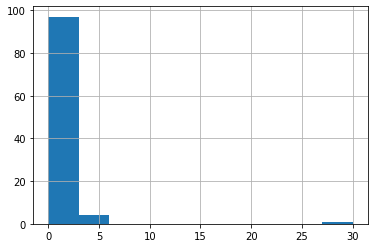

In [24]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count